In [1]:
import numpy as np
import h5py
import glob, os, re, sys
sys.path.append('../')

from PRFMData import PRFMDataset
import astro_helper as ah

import configparser
config = configparser.ConfigParser()
config.read('../config/config_pressures-weights-SFRs.ini')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')
custom_colors = {
    'grey': '#3C3C3C',
    'turquoise': '#5E9F87'
}

In [2]:
ETG_vlM = PRFMDataset(
    params = config["ETG-vlM"],
    galaxy_type="ETG-vlM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [3]:
ETG_lowM = PRFMDataset(
    params = config["ETG-lowM"],
    galaxy_type="ETG-lowM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [4]:
ETG_medM = PRFMDataset(
    params = config["ETG-medM"],
    galaxy_type="ETG-medM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [5]:
ETG_hiM = PRFMDataset(
    params = config["ETG-hiM"],
    galaxy_type="ETG-hiM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [6]:
NGC300 = PRFMDataset(
    params = config["NGC300"],
    galaxy_type="NGC300",
    total_height=1.5, # kpc
    Rmax=6., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_799.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [7]:
MW = PRFMDataset(
    params = config["MW"],
    galaxy_type="MW",
    total_height=1.5, # kpc
    Rmax=6., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_600.hdf5",
    exclude_temp_above=1.e4,
    exclude_avir_below=2.,
    realign_galaxy_to_gas=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

# calculate the integrand of the ISM weight for each case, to check if it's symmetrical

In [8]:
from scipy.signal import savgol_filter as sg
polyno=2
wndwlen=5

In [9]:
data = [ETG_vlM, ETG_lowM, ETG_medM, ETG_hiM, NGC300, MW]
zbin_centers = [instance.zbin_centers_ptl for instance in data]
labels = ['ETG', 'ETG', 'ETG quenched', 'ETG', 'NGC300', 'MW']

In [12]:
integrands = []
for instance in data:
    rho = instance.get_density_Rphiz(zbinsep=instance.zbin_sep_ptl, PartType=6)
    ptl = instance._get_potential_Rphiz()

    dz = sg(instance.zbin_centers_3d_ptl, wndwlen, polyno, deriv=1, axis=2)
    dPhi = sg(ptl, wndwlen, polyno, deriv=1, axis=2)
    dPhidz = dPhi/dz

    integrand = rho * dPhidz * instance.zbin_sep_ptl
    integrands.append(integrand)
    print("finished one")

finished one
finished one
finished one
finished one
finished one
finished one


3.20986451620671e-14 3.20986451620671e-14
9.42824921376253e-13 9.428249213762528e-13
-1.5571437578870631e-13 -1.5571437578870642e-13
8.541202489526718e-13 8.541202489526712e-13
-5.448454538819009e-14 -5.448454538819012e-14
1.9149331907111185e-13 1.914933190711119e-13


/n/home03/sjeffreson/.conda/envs/jupyter_py3.8/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


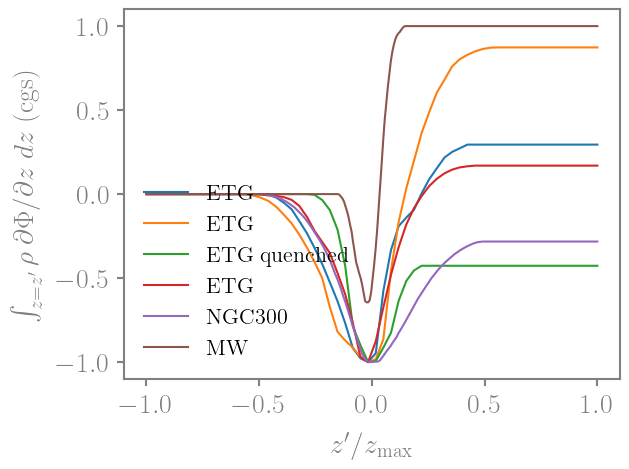

In [16]:
for zbins, integrand, label in zip(zbin_centers, integrands, labels):
    sum = np.nansum(np.nanmedian(integrand, axis=(0,1)))
    cumsum = np.nancumsum(np.nanmedian(integrand, axis=(0,1)))
    print(sum, cumsum[-1])
    plt.plot(zbins/np.nanmax(zbins), cumsum/np.nanmax(np.fabs(cumsum)), label=label)
plt.ylabel(r'$\int_{z=z^\prime}{\rho \; \partial \Phi/\partial z \; dz}$ (cgs)')
plt.xlabel(r'$z^\prime/z_{\rm max}$')
plt.legend(frameon=False, loc='lower left', fontsize=16)
plt.show()